In [0]:
import numpy as np
import pandas as pd
import pydotplus
from google.colab import drive
from IPython.display import Image
from pylab import rcParams
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from io import StringIO
import warnings

In [0]:
%matplotlib inline
rcParams['figure.figsize'] = 6, 6
warnings.filterwarnings("ignore")

In [0]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
file_loc = '/content/drive/My Drive/GreyAtom/Google_Colab/Decision_Tree_Example/loan_prediction.csv'

In [0]:
df = pd.read_csv(file_loc)

In [9]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [10]:
df.shape

(614, 6)

In [0]:
from sklearn.tree import DecisionTreeClassifier as dt
clf = dt()

In [12]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
X = df.iloc[:,0:len(df.columns)-1].values
Y = df.iloc[:,-1].values

In [14]:
X.shape

(614, 5)

In [15]:
Y.shape

(614,)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [17]:
X_train.shape

(460, 5)

In [18]:
X_test.shape

(154, 5)

In [0]:
a, b = np.arange(10).reshape((5, 2)), range(5)

In [20]:
a

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [21]:
b

range(0, 5)

In [0]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(a, b)

In [23]:
X_train1

array([[8, 9],
       [0, 1],
       [6, 7]])

In [24]:
Y_train1

[4, 0, 3]

In [0]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(a, b)

In [26]:
X_train2

array([[4, 5],
       [2, 3],
       [6, 7]])

In [0]:
X_train3, X_test3,Y_train3,Y_test3 = train_test_split(a, b, random_state = 8)

In [28]:
X_train3

array([[2, 3],
       [0, 1],
       [6, 7]])

In [0]:
X_train4, X_test4,Y_train4,Y_test4 = train_test_split(a, b, random_state = 8)

In [30]:
X_train4

array([[2, 3],
       [0, 1],
       [6, 7]])

In [0]:
scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='f1_macro')

In [32]:
scores.mean()

0.6120176123428358

In [0]:
# Fit the model
clf.fit(X_train, Y_train)

# Make predictions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [34]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
train_cols = df.columns[0:len(df.columns)-1]

In [0]:
target_cols = df.columns[-1]

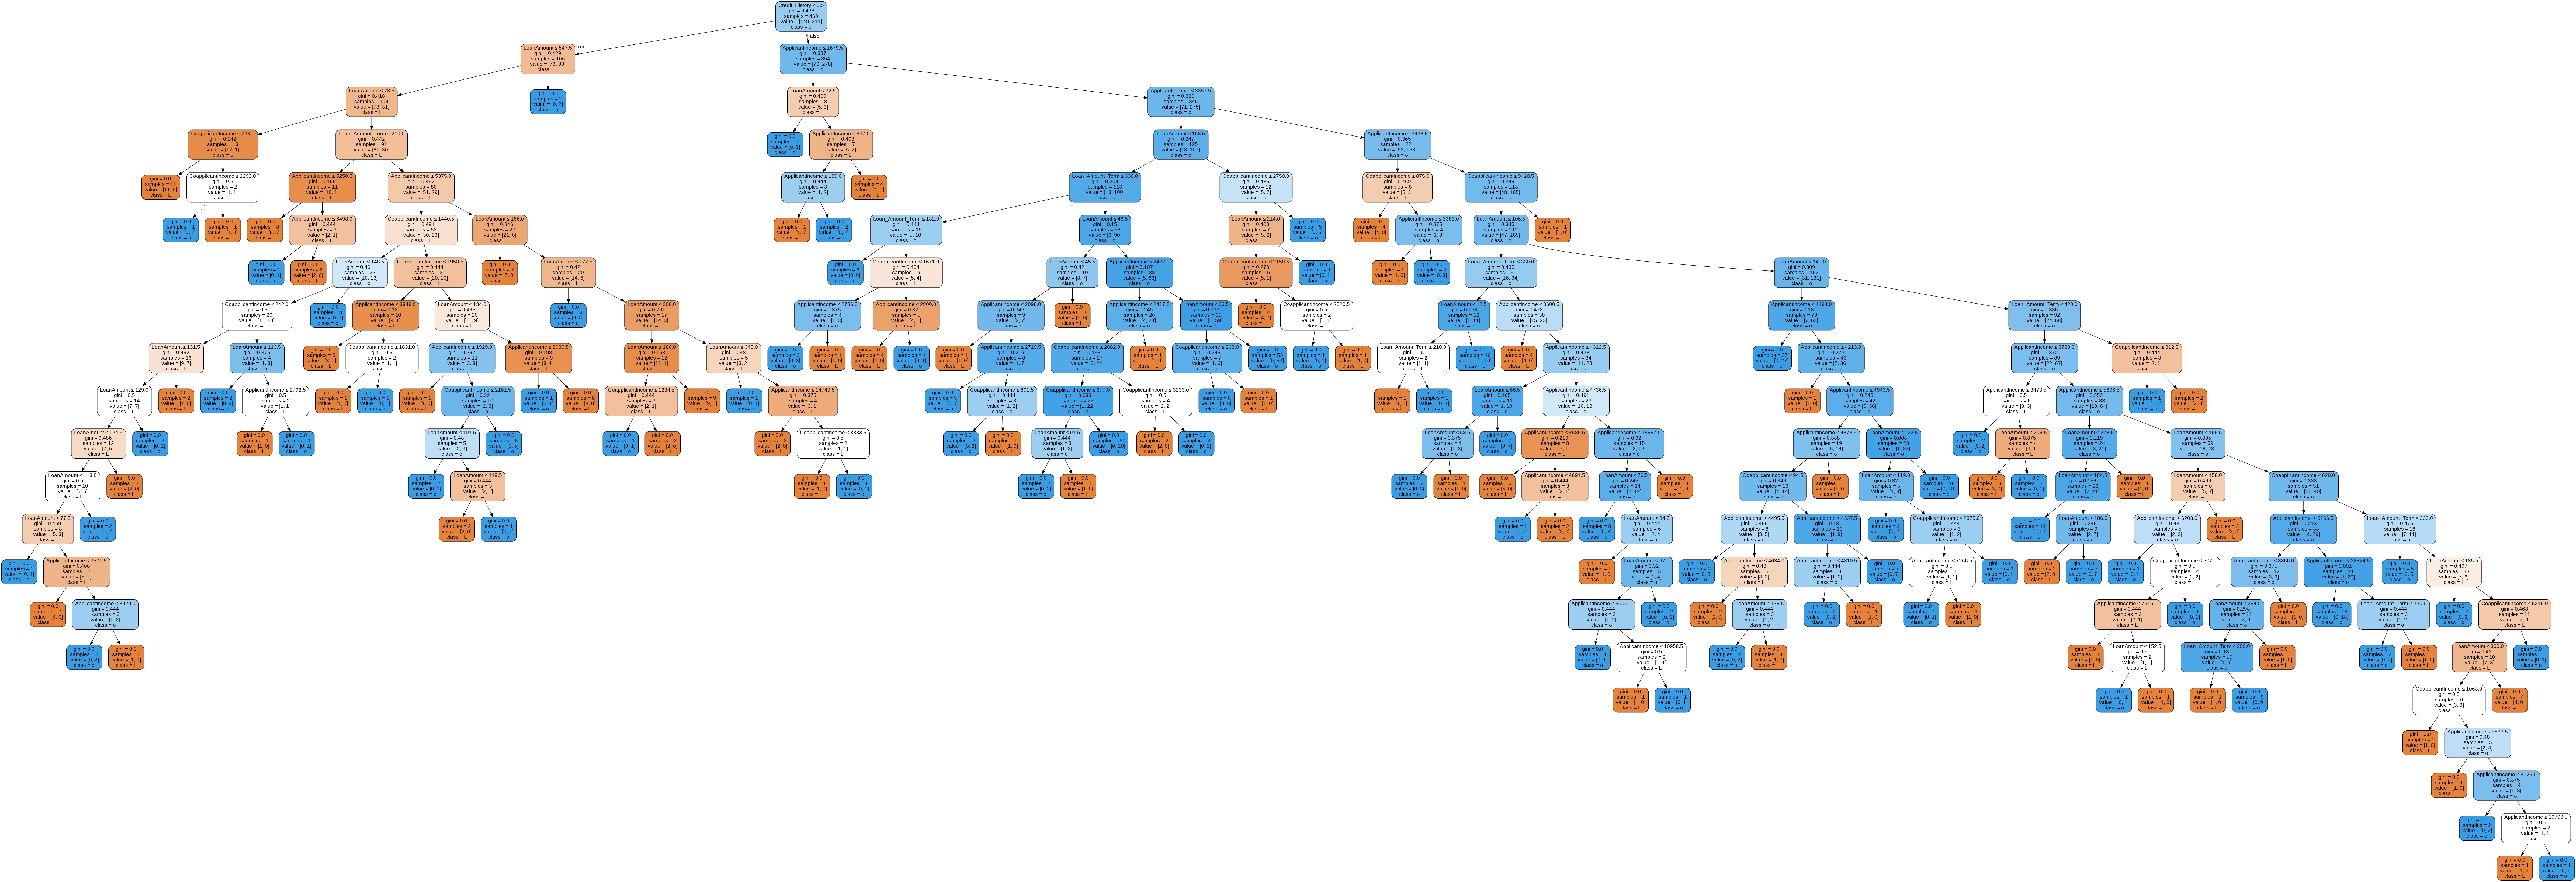

In [37]:
plot_decision_tree(clf, train_cols, target_cols)

In [38]:
print('The Training F1 Score is', f1_score(train_predictions, Y_train))
print('The Testing F1 Score is', f1_score(test_predictions, Y_test))

The Training F1 Score is 1.0
The Testing F1 Score is 0.7420814479638009


In [0]:
parameters = {'max_depth':[1,2,3,4,5], 'min_samples_leaf':[1,2,3,4,5], 'min_samples_split':[2,3,4,5], 'criterion' : ['gini','entropy']}
scorer = make_scorer(f1_score)

In [0]:
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

In [0]:
grid_fit = grid_obj.fit(X_train, Y_train)

In [0]:
best_clf = grid_fit.best_estimator_

In [43]:
best_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

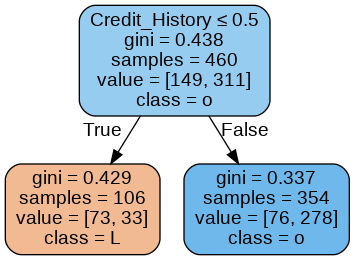

In [44]:
plot_decision_tree(best_clf, train_cols, target_cols)

In [45]:
scores = cross_val_score(best_clf, X_train, Y_train, cv=5, scoring='f1_macro')
scores.mean()

0.7056824255406972

In [46]:
best_clf.fit(X_train, Y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, Y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, Y_test))

The training F1 Score is 0.8360902255639098
The testing F1 Score is 0.8620689655172413
